In [1]:
import os
import json


In [19]:
def get_number_of_models(file):
    with open(os.path.join(os.path.join("out","d4_compilation_stats"),file), 'r') as fp:
        data = json.load(fp)
    if data['Number of models']=="NaN":
        return -1
    return int(data['Number of models'])


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
def is_float(element):
    try:
        float(element)
        return True
    except ValueError:
        return False
    

In [5]:
data = {}
timeout = 600


In [6]:
def load_compilation_time(directory,col_name):
    data = {}
    for file in list(os.listdir(directory)):
        with open(os.path.join(directory,file), 'r') as fp:
            data_d4 = json.load(fp)
        data[file] = {}
        if (data_d4['Compilation time'] != "NaN" and  data_d4['Compilation time'] != -1) :
            data[file][col_name]=data_d4['Compilation time']
        else:
            data[file][col_name]=pd.NA
    return data

data_comp = pd.DataFrame.from_dict(data,orient='index')
data_comp

compil_key = "d4 compilation (seconds)"
tmp =load_compilation_time("out/d4_compilation_stats",compil_key)
for key in tmp:
    if key not in data:
        data[key]={}
    data[key].update(tmp[key])
data_comp = pd.DataFrame.from_dict(data,orient='index')
data_comp

,d4 compilation (seconds)
10.sk_1_46.json,0.066169
107.sk_3_90.json,0.065834
109.sk_4_36.json,0.216624
10random.json,0.116350
110.sk_3_88.json,1.569900
...,...
uf250-095.json,3.470730
uf250-096.json,4.472571
uf250-097.json,1.417047
uf250-098.json,5.077664


In [7]:
def load_jddnnf_data(directory, col_name):
    data = {}
    for file in list(os.listdir(directory)):
        with open(os.path.join(directory,file), 'r') as fp:
            data_j = json.load(fp)
        data[file] = {}
        for key,tmp in data_j.items():
            if tmp['total'] != "TIMEOUT":
                for key2 in tmp:
                    data[file][col_name % (key2,key)]=tmp[key2]
            else:
                for key2 in tmp:
                    data[file][col_name % (key2,key)]=pd.NA
    return data

jddnnf_key = "jddnnf %s %s"
tmp = load_jddnnf_data("out/top1_config_jddnnf",jddnnf_key)
for key in tmp:
    if key not in data:
        data[key]={}
    data[key].update(tmp[key])

In [8]:
data_df = pd.DataFrame.from_dict(data,orient='index')
data_df

,d4 compilation (seconds),jddnnf parsing 0,jddnnf smoothing 0,jddnnf top 0,jddnnf total 0
blockmap_10_01.net.json,0.415205,0.050,0.104,0.094,0.365149
or-50-20-9-UC-30.json,0.066104,0.015,0.025,0.013,0.164903
or-60-5-8-UC-10.json,11.647734,1.949,12.972,2.291,17.445512
or-100-5-6-UC-50.json,0.032683,0.011,0.007,0.008,0.114900
blasted_case105.json,0.065679,0.021,0.037,0.018,0.164748
...,...,...,...,...,...
or-70-5-1-UC-30.json,0.032713,0.029,0.017,0.020,0.266682
uf250-071.json,5.524485,0.011,0.017,0.008,0.164804
mastermind_06_08_03.net.json,11.785872,1.430,13.910,15.471,30.988125
scenarios_treemin.sb.pl.sk_9_19.json,21.668859,0.156,0.846,0.649,1.782404


In [9]:
data_df["compile+total"] = data_df["d4 compilation (seconds)"]+data_df["jddnnf total 0"]
data_df

,d4 compilation (seconds),jddnnf parsing 0,jddnnf smoothing 0,jddnnf top 0,jddnnf total 0,compile+total
blockmap_10_01.net.json,0.415205,0.050,0.104,0.094,0.365149,0.780354
or-50-20-9-UC-30.json,0.066104,0.015,0.025,0.013,0.164903,0.231007
or-60-5-8-UC-10.json,11.647734,1.949,12.972,2.291,17.445512,29.093246
or-100-5-6-UC-50.json,0.032683,0.011,0.007,0.008,0.114900,0.147583
blasted_case105.json,0.065679,0.021,0.037,0.018,0.164748,0.230427
...,...,...,...,...,...,...
or-70-5-1-UC-30.json,0.032713,0.029,0.017,0.020,0.266682,0.299395
uf250-071.json,5.524485,0.011,0.017,0.008,0.164804,5.689289
mastermind_06_08_03.net.json,11.785872,1.430,13.910,15.471,30.988125,42.773996
scenarios_treemin.sb.pl.sk_9_19.json,21.668859,0.156,0.846,0.649,1.782404,23.451263


In [10]:
lines_with_null = data_df.index[data_df.isnull().any(axis=1)]
clean_df= data_df.copy()
clean_df= clean_df.drop(lines_with_null)
clean_df

,d4 compilation (seconds),jddnnf parsing 0,jddnnf smoothing 0,jddnnf top 0,jddnnf total 0,compile+total
blockmap_10_01.net.json,0.415205,0.050,0.104,0.094,0.365149,0.780354
or-50-20-9-UC-30.json,0.066104,0.015,0.025,0.013,0.164903,0.231007
or-60-5-8-UC-10.json,11.647734,1.949,12.972,2.291,17.445512,29.093246
or-100-5-6-UC-50.json,0.032683,0.011,0.007,0.008,0.114900,0.147583
blasted_case105.json,0.065679,0.021,0.037,0.018,0.164748,0.230427
...,...,...,...,...,...,...
or-70-5-1-UC-30.json,0.032713,0.029,0.017,0.020,0.266682,0.299395
uf250-071.json,5.524485,0.011,0.017,0.008,0.164804,5.689289
mastermind_06_08_03.net.json,11.785872,1.430,13.910,15.471,30.988125,42.773996
scenarios_treemin.sb.pl.sk_9_19.json,21.668859,0.156,0.846,0.649,1.782404,23.451263


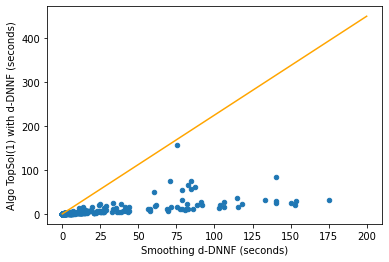

In [11]:
smooth_key = "jddnnf smoothing 0"
top_key= "jddnnf top 0"
plot_df = clean_df.copy()
plot_df = plot_df.rename(columns={smooth_key: "Smoothing d-DNNF (seconds)", 
                                  top_key: "Algo TopSol(1) with d-DNNF (seconds)"})
plot_df.plot(x="Smoothing d-DNNF (seconds)", y="Algo TopSol(1) with d-DNNF (seconds)",kind="scatter")
plt.plot([0,200],[0,450],'-',color="orange")
plt.show()

In [12]:
clean_df["d4 compilation (seconds)"] = clean_df["d4 compilation (seconds)"].astype("float64", errors = 'raise')
clean_df["compile+total"] = clean_df["compile+total"].astype("float64", errors = 'raise')


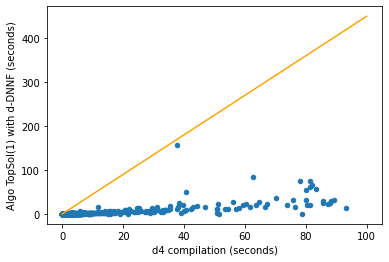

In [13]:
compil_key = "d4 compilation (seconds)"
top_key= "jddnnf top 0"
plot_df = clean_df.copy()
plot_df = plot_df.rename(columns={compil_key: "d4 compilation (seconds)", 
                                  top_key: "Algo TopSol(1) with d-DNNF (seconds)"})
plot_df.plot(x="d4 compilation (seconds)", y="Algo TopSol(1) with d-DNNF (seconds)",kind="scatter")
plt.plot([0,100],[0,450],'-',color="orange")
plt.show()

In [14]:
analyze_df=clean_df.copy()
d3bis_df= analyze_df[analyze_df["compile+total"]<timeout]
d3bis_df["jddnnf top 0"].describe()

count    1145.000000
mean        1.812025
std         8.172511
min         0.003000
25%         0.017000
50%         0.039000
75%         0.235000
max       156.715000
Name: jddnnf top 0, dtype: float64

In [15]:
d4_df =analyze_df[analyze_df["compile+total"]<timeout]
d4_df["d4 compilation (seconds)"].describe()

count    1145.000000
mean        5.295412
std        14.391995
min         0.032322
25%         0.064768
50%         0.165896
75%         2.722601
max        93.231348
Name: d4 compilation (seconds), dtype: float64

In [16]:
d5_df=analyze_df[analyze_df["compile+total"]<timeout]
d5_df["compile+total"].describe()


count    1145.000000
mean       13.409959
std        41.157530
min         0.147091
25%         0.280552
50%         0.536011
75%         3.907896
max       302.886877
Name: compile+total, dtype: float64

In [17]:
d6_df= analyze_df[analyze_df["compile+total"]<timeout]
d6_df["jddnnf smoothing 0"].describe()

count    1145.000000
mean        5.623630
std        19.670575
min         0.003000
25%         0.029000
50%         0.070000
75%         0.520000
max       175.300000
Name: jddnnf smoothing 0, dtype: float64

In [20]:
d7_df = analyze_df[analyze_df["compile+total"]<2*timeout]
d7_df["jddnnf parsing 0"].describe()

count    1145.000000
mean        0.519542
std         1.707100
min         0.008000
25%         0.018000
50%         0.038000
75%         0.136000
max        15.168000
Name: jddnnf parsing 0, dtype: float64